In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
ab_data = pd.read_csv('data/ab_data.csv')

In [68]:
ab_data

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1
...,...,...,...,...
290477,751197,2017-01-03,A,0
290478,945152,2017-01-12,A,0
290479,734608,2017-01-22,A,0
290480,697314,2017-01-15,A,0


In [69]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [70]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [71]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [72]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count'] * 100
print(round(daily_data[
    (daily_data['timestamp'] == '2017-01-05') & (daily_data['group'] == 'A')
]['conversion'], 2))
display(daily_data.head())

6    12.32
Name: conversion, dtype: float64


,timestamp,group,users_count,converted,conversion
0,2017-01-02,A,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063
3,2017-01-03,B,6620,754,11.389728
4,2017-01-04,A,6573,797,12.125361


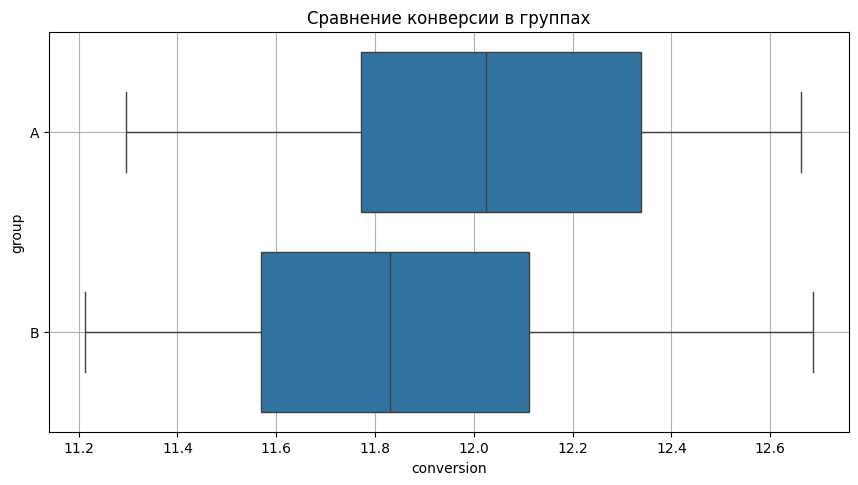

In [73]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid(True);

In [74]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


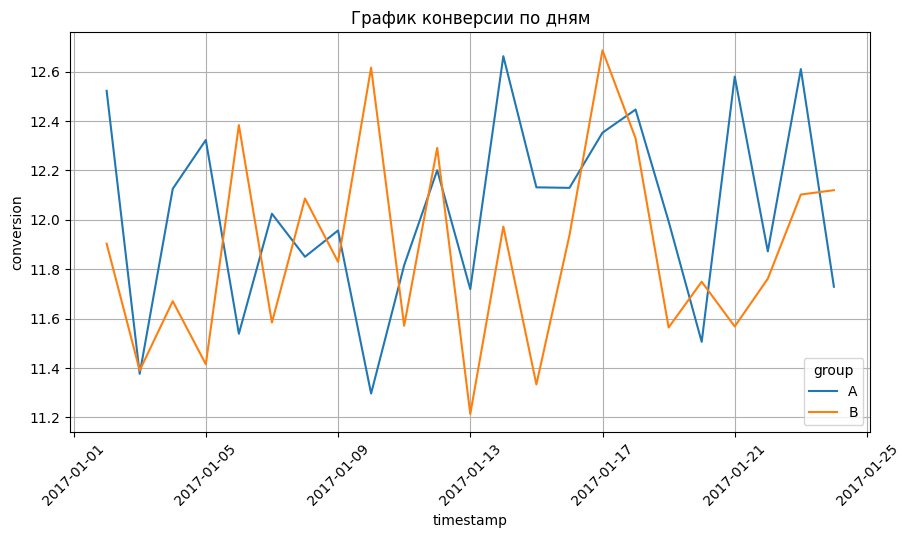

In [75]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid(True);

In [76]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

C:\Users\Admin\AppData\Local\Temp\ipykernel_19516\906787284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [77]:
daily_data_a

,timestamp,group,users_count,converted,conversion,cum_users_count
0,2017-01-02,A,2851,357,12.521922,2851
2,2017-01-03,A,6584,749,11.376063,9435
4,2017-01-04,A,6573,797,12.125361,16008
6,2017-01-05,A,6419,791,12.322792,22427
8,2017-01-06,A,6604,762,11.538462,29031
10,2017-01-07,A,6595,793,12.024261,35626
12,2017-01-08,A,6692,793,11.849970,42318
14,2017-01-09,A,6624,792,11.956522,48942
16,2017-01-10,A,6657,752,11.296380,55599
18,2017-01-11,A,6686,790,11.815734,62285


In [78]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


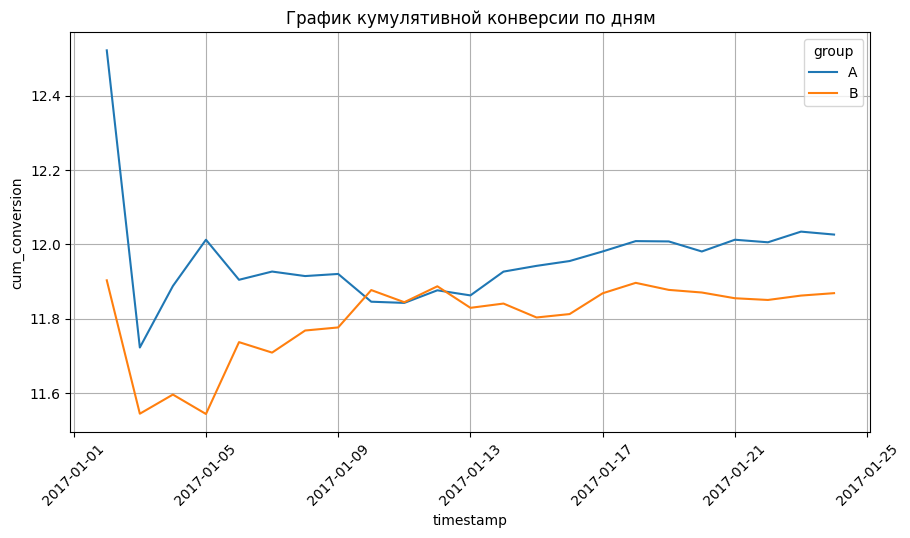

In [79]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [80]:
df_ab_a = pd.read_csv('data/ab_test-redesign_sample_a.csv')
df_ab_b = pd.read_csv('data/ab_test-redesign_sample_b.csv')

In [81]:
display(df_ab_a.head()),
display(df_ab_b.head())

,date,cid,transactions,revenue,group
0,2020-11-06,1.001648e+09,0,0,A
1,2020-11-06,1.001936e+09,0,0,A
2,2020-11-06,1.003214e+08,0,0,A
3,2020-11-06,1.004393e+09,0,0,A
4,2020-11-06,1.006382e+09,0,0,A


,date,cid,transactions,revenue,group
0,2020-11-06,1.000135e+09,0,0,B
1,2020-11-06,1.001648e+09,0,0,B
2,2020-11-06,1.003214e+08,0,0,B
3,2020-11-06,1.003652e+09,0,0,B
4,2020-11-06,1.003833e+09,0,0,B


In [82]:
df_ab_a['date'] = pd.to_datetime(df_ab_a['date'], format='%Y-%m-%d')
df_ab_b['date'] = pd.to_datetime(df_ab_b['date'], format='%Y-%m-%d')

In [83]:
# Создаем агрегированные значения по датам
agg_df = df_ab_a.groupby('date').agg(
    transactions_day_sum=('transactions', 'sum'),
    count_user_day=('cid', 'count'),
    revenue_day_sum=('revenue', 'sum')
).reset_index()  

# Объединяем полученные агрегаты с оригинальным фреймом по дате
# df_ab_a = df_ab_a.merge(agg_df, on='date', how='left')

In [84]:
agg_df

,date,transactions_day_sum,count_user_day,revenue_day_sum
0,2020-11-06,16,2576,1577279
1,2020-11-07,23,2704,1721886
2,2020-11-08,25,3354,846051
3,2020-11-09,18,3234,708830
4,2020-11-10,29,3022,826984
5,2020-11-11,19,3218,1209656
6,2020-11-12,19,3467,607839
7,2020-11-13,36,3676,1338816
8,2020-11-14,30,3372,2659277
9,2020-11-15,27,3881,1189970


In [85]:
# Расчет кумулятивных метрик для группы A
df_ab_a['cum_visitors'] = df_ab_a.index + 1
df_ab_a['cum_transactions'] = df_ab_a['transactions'].cumsum()
df_ab_a['cum_revenue'] = df_ab_a['revenue'].cumsum()
df_ab_a['cum_conversion'] = (df_ab_a['cum_transactions'] / df_ab_a['cum_visitors']) * 100
df_ab_a['cum_avg_check'] = df_ab_a['cum_revenue'] / df_ab_a['cum_transactions'].replace(0, 1)

# Расчет кумулятивных метрик для группы B
df_ab_b['cum_visitors'] = df_ab_b.index + 1
df_ab_b['cum_transactions'] = df_ab_b['transactions'].cumsum()
df_ab_b['cum_revenue'] = df_ab_b['revenue'].cumsum()
df_ab_b['cum_conversion'] = (df_ab_b['cum_transactions'] / df_ab_b['cum_visitors']) * 100
df_ab_b['cum_avg_check'] = df_ab_b['cum_revenue'] / df_ab_b['cum_transactions'].replace(0, 1)

# Расчет средней кумулятивной конверсии
avg_cum_conversion = (df_ab_a['cum_conversion'].iloc[-1] + df_ab_b['cum_conversion'].iloc[-1]) / 2

# Вывод результатов
print("Средняя кумулятивная конверсия:", round(avg_cum_conversion, 2))

Средняя кумулятивная конверсия: 0.74


In [86]:
df_combined = pd.concat([df_ab_a, df_ab_b], ignore_index=True)
df_combined

,date,cid,transactions,revenue,group,cum_visitors,cum_transactions,cum_revenue,cum_conversion,cum_avg_check
0,2020-11-06,1.001648e+09,0,0,A,1,0,0,0.000000,0.000000
1,2020-11-06,1.001936e+09,0,0,A,2,0,0,0.000000,0.000000
2,2020-11-06,1.003214e+08,0,0,A,3,0,0,0.000000,0.000000
3,2020-11-06,1.004393e+09,0,0,A,4,0,0,0.000000,0.000000
4,2020-11-06,1.006382e+09,0,0,A,5,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
122949,2020-11-23,9.965675e+08,0,0,B,61379,463,32454342,0.754330,70095.771058
122950,2020-11-23,9.970803e+07,0,0,B,61380,463,32454342,0.754317,70095.771058
122951,2020-11-23,9.984814e+08,0,0,B,61381,463,32454342,0.754305,70095.771058
122952,2020-11-23,9.991118e+08,0,0,B,61382,463,32454342,0.754293,70095.771058


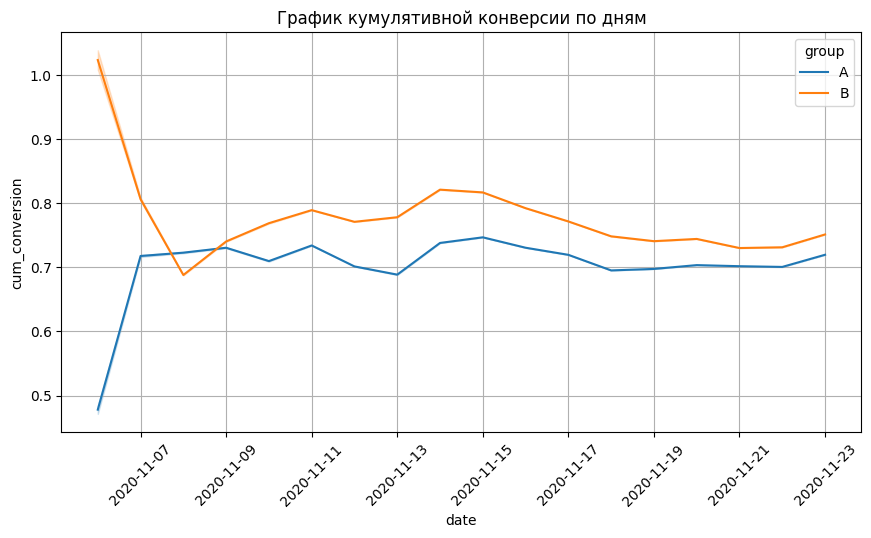

In [89]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=df_combined, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);